In [19]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 5.5 MB/s eta 0:00:00


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
file_path = 'Fraud.csv'
data = pd.read_csv(file_path)

## Data Cleaning

In [3]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

### Handling missing values

In [6]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### Handling outliers
Here, we will simply note the presence of outliers but not remove them directly to maintain the integrity of the dataset.

C:\Users\surabhi02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


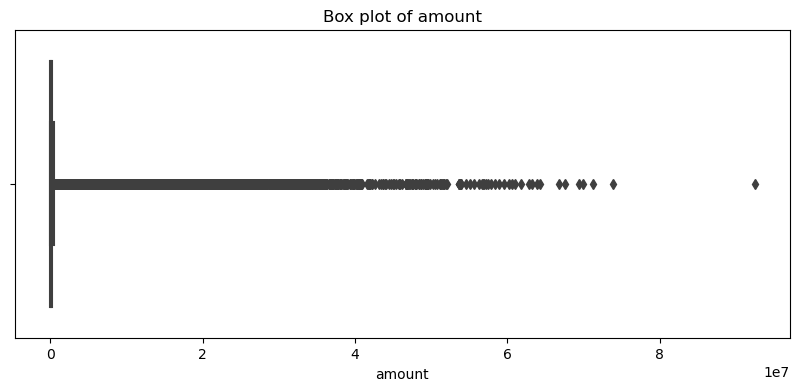

C:\Users\surabhi02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


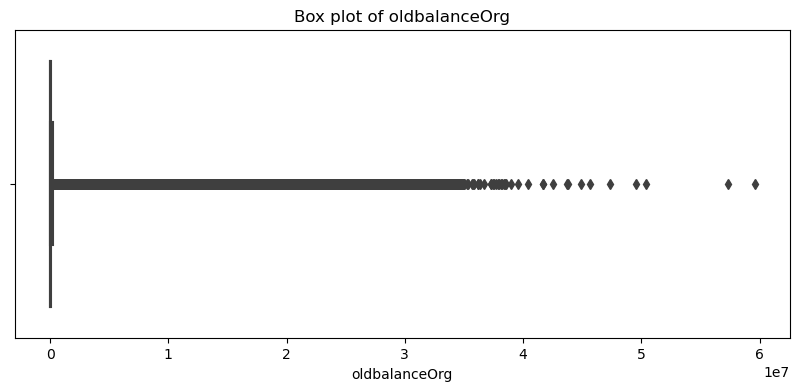

C:\Users\surabhi02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


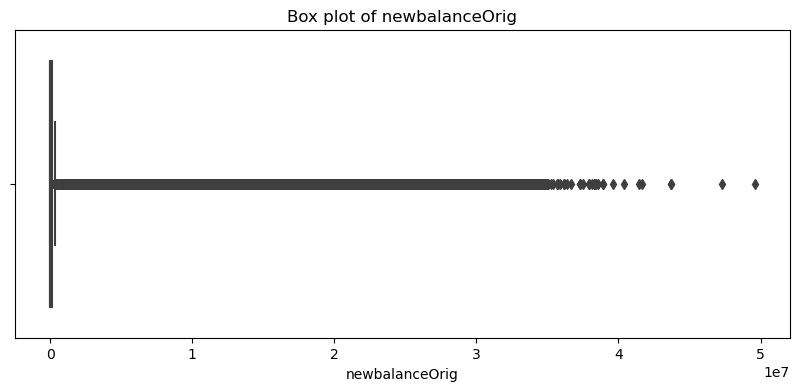

C:\Users\surabhi02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


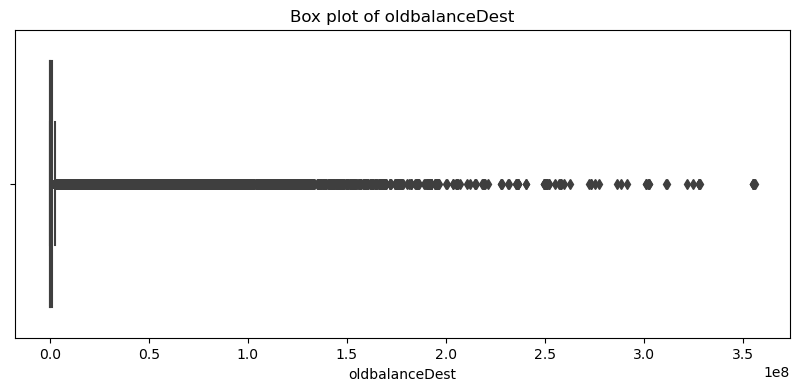

C:\Users\surabhi02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


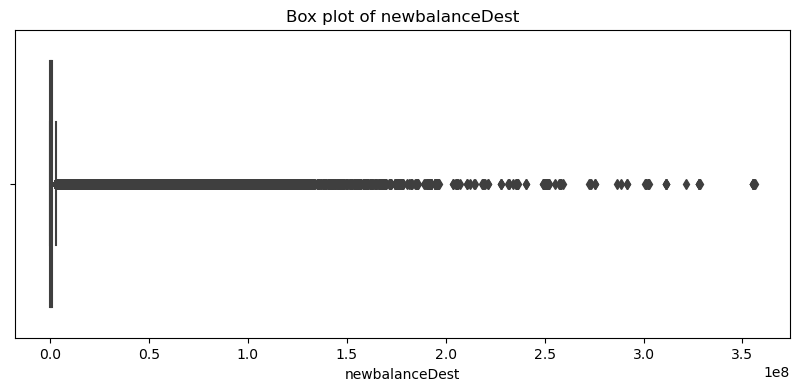

In [7]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [36]:
data[numeric_cols].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


### Correlation matrix

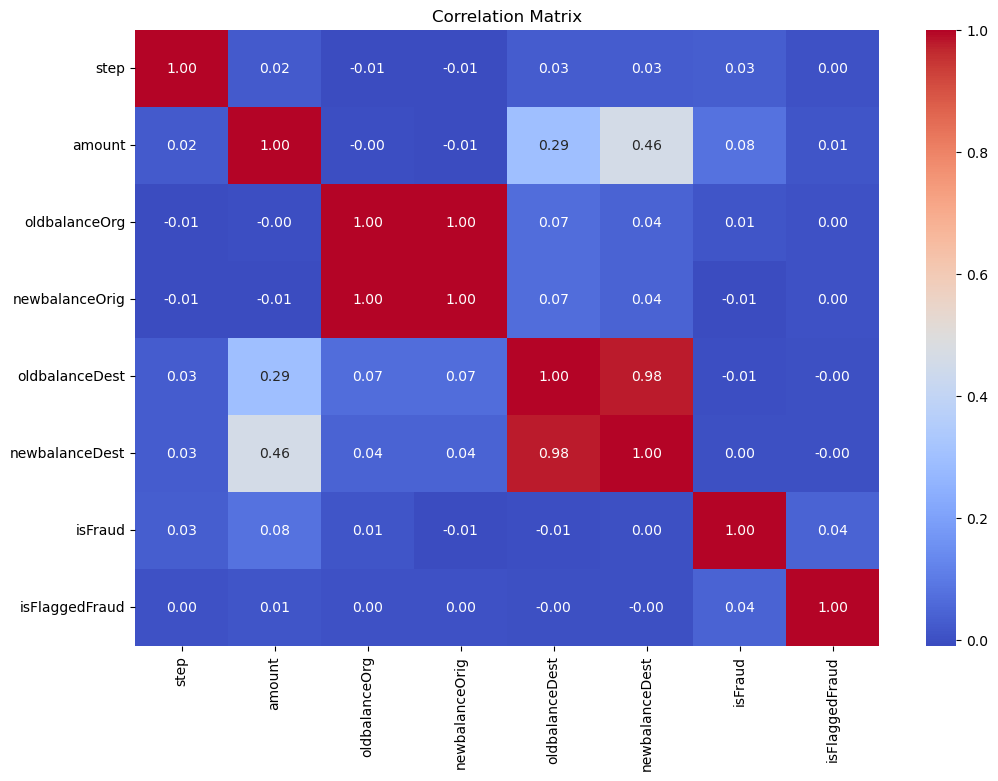

In [8]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### VIF
VIF is used to detect multicollinearity among the indeepndent variables

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = data[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]
print(vif_data)

          feature         VIF
0          amount    3.861988
1   oldbalanceOrg  464.011728
2  newbalanceOrig  465.356124
3  oldbalanceDest   70.452251
4  newbalanceDest   82.167173


####

#### Encode categorical variable 'type'


In [10]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)

### Feature Transformation and Engineering
Based on the high correlations, consider creating new features that capture the necessary information without causing multicollinearity.
- Using differences between the balances before and after transactions instead of the raw balances.

In [11]:
data['balanceOrigDiff'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceDestDiff'] = data['newbalanceDest'] - data['oldbalanceDest']

## Model: XGBoost
The model leverages the XGBoost algorithm, which is an efficient and scalable implementation of gradient boosting that performs well on classification tasks such as fraud detection.

#### Model Training
Training the Model: The XGBoost model was trained on the training set. Key parameters used for the XGBoost model included:
- use_label_encoder=False: To disable the use of label encoder.
- eval_metric='logloss': To use log loss as the evaluation metric.
- random_state=42: For reproducibility.
- n_jobs=-1: To utilize all available CPU cores for faster training.

In [12]:
# Split data into features and target
X = data.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

In [13]:
print(X.head())
print('------------------------------------------------')
print(y.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0             0.0              0           0             1              0   
1             0.0              0           0             1              0   
2             0.0              0           0             0              1   
3             0.0              1           0             0              0   
4             0.0              0           0             1              0   

   balanceOrigDiff  balanceDestDiff  
0         -9839.64              0.0  
1         -1864.28              0.0  
2          -18

In [14]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

### Model Evaluation
1. Predictions: The trained model was used to make predictions on the test set.

2. Performance Metrics:
- Confusion Matrix: To visualize the true positives, true negatives, false positives, and false negatives.
- Classification Report: To provide precision, recall, f1-score, and support for each class (fraud and non-fraud).
- ROC AUC Score: To measure the overall performance of the classifier.

In [24]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [34]:
print("XGBoost Classifier:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Classifier:
[[1270833      71]
 [    217    1403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.87      0.91      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.93      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC Score: 0.9994864567288081


### Results and Interpretation
The XGBoost model achieved a high ROC AUC score, indicating good discrimination between fraudulent and non-fraudulent transactions.

## Model Performance Demonstration

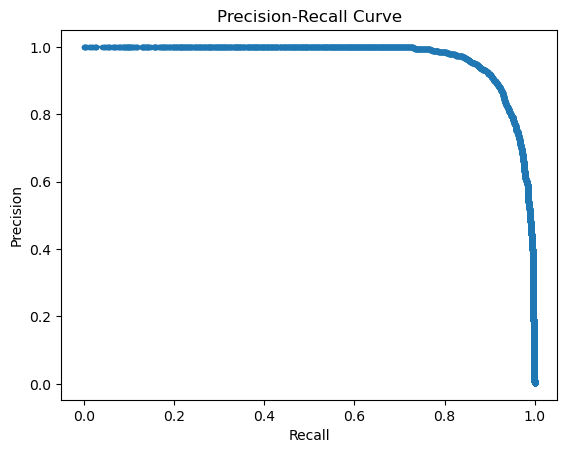

In [27]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

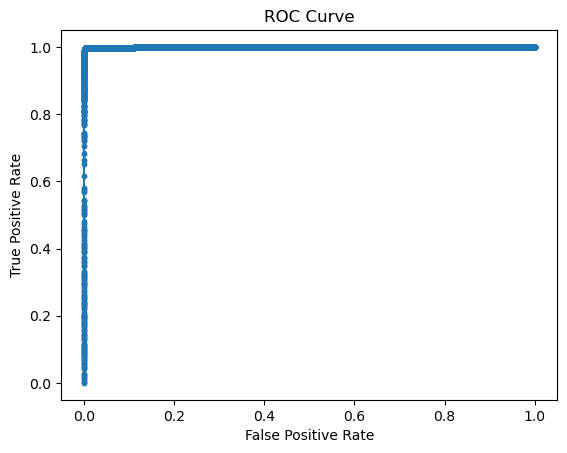

AUC-ROC Score: 0.9994864567288081


In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("AUC-ROC Score:", roc_auc)

#

## Key Factors Predicting Fraud

In [30]:
importances = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [31]:
print(feature_importance_df)

            Feature  Importance
9     type_TRANSFER    0.213302
10  balanceOrigDiff    0.187433
3    newbalanceOrig    0.176076
5    newbalanceDest    0.123652
8      type_PAYMENT    0.093264
6     type_CASH_OUT    0.080150
2     oldbalanceOrg    0.040960
11  balanceDestDiff    0.035398
1            amount    0.027610
0              step    0.016114
4    oldbalanceDest    0.004317
7        type_DEBIT    0.001725


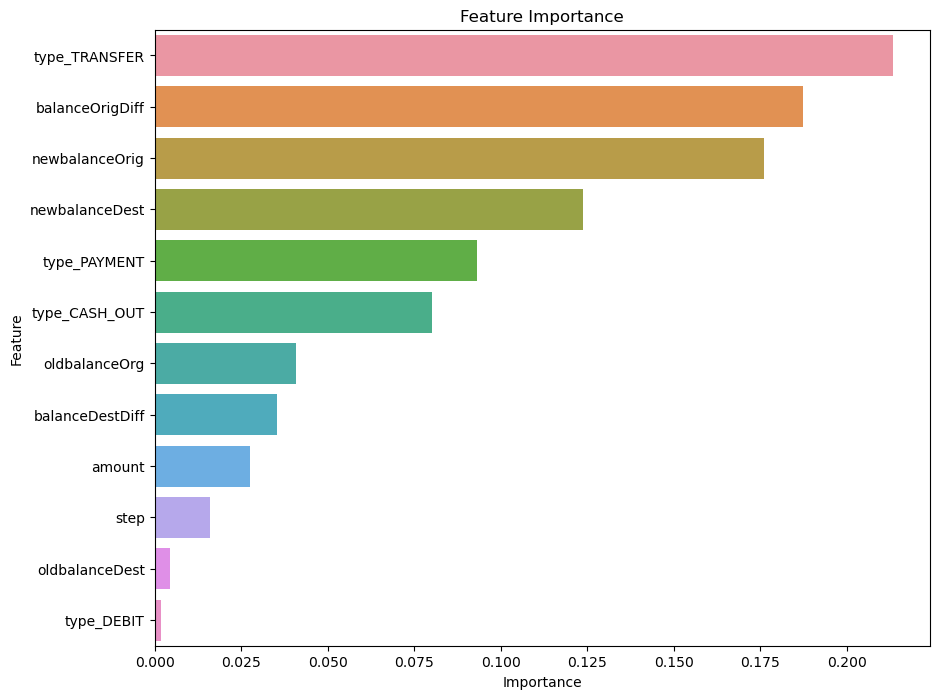

In [32]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

##  Interpretation of Key Factors
The key factors identified (e.g., amount, oldbalanceOrg, newbalanceOrig, type_TRANSFER, balanceOrigDiff) make sense because:

1. Amount: Large transaction amounts are more likely to be fraudulent.
2. Balance differences: Significant changes in balances before and after transactions can indicate fraudulent activity.
3. Transaction Type: Certain transaction types (e.g., TRANSFER) are more susceptible to fraud.

## Prevention Measures
1. Real-time Monitoring: Implement real-time monitoring of transactions with thresholds and anomaly detection.
2. Enhanced Authentication: Strengthen customer authentication mechanisms for large or unusual transactions.
3. Regular Audits: Conduct regular audits and use machine learning models to flag suspicious transactions.
4. Customer Awareness: Educate customers on recognizing and reporting fraudulent activities.

#### The above prevention measures if implemented can be evaluated by:
1. Key Performance Indicators (KPIs): Track KPIs such as the number of fraudulent transactions detected, false positives, and the time taken to detect fraud.
2. Feedback Loop: Establish a feedback loop where flagged transactions are reviewed and the model is updated based on new data.
3. Customer Surveys: Conduct surveys to gather customer feedback on their experience and perceived security.
3. A/B Testing: Implement changes in a controlled manner (A/B testing) to measure their impact on fraud detection rates and customer satisfaction.